 # Petfinder: Northern California Adoption Rate EDA
 ![ImdbIcon](images/pets.jpg)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction import text
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [2]:
dogs = pd.read_csv('./petfinder_data/dogs_eda.csv')

In [3]:
dogs.head()

,organization_id,age,gender,size,coat,name,description,status_changed_at,published_at,distance,...,good_with_dogs,good_with_cats,city,contact.address.state,zipcode,has_photo,days_on_petfinder,year,year_adopted,month_adopted
0,CA1005,Baby,Male,Medium,Medium,Spirit (S Litter),EMAIL: stonecliffeadoption@gmail.com for an a...,2019-02-10 03:03:57+00:00,2019-01-02 03:49:40+00:00,16.3248,...,1,2,Dublin,CA,94568.0,1,39.0,2019,2019,2
1,CA1005,Young,Female,Small,Wire,Tachi,EMAIL: stonecliffeadoption@gmail.com for an a...,2019-03-10 05:20:18+00:00,2019-01-02 03:57:32+00:00,16.3248,...,1,2,Dublin,CA,94568.0,1,67.0,2019,2019,3
2,CA1005,Baby,Male,Small,Wire,Walley ( W Litter pup ),EMAIL: stonecliffeadoption@gmail.com for an a...,2019-02-10 03:04:27+00:00,2019-01-02 04:02:15+00:00,16.3248,...,1,2,Dublin,CA,94568.0,1,39.0,2019,2019,2
3,CA1005,Baby,Male,Small,Wire,Wesley ( W litter pup ),EMAIL: stonecliffeadoption@gmail.com for an a...,2019-01-20 00:45:54+00:00,2019-01-02 04:06:50+00:00,16.3248,...,1,2,Dublin,CA,94568.0,1,18.0,2019,2019,1
4,CA1005,Baby,Male,Small,Wire,"Wilbur *Adoption in process JL""",EMAIL: stonecliffeadoption@gmail.com for an a...,2019-03-24 03:42:52+00:00,2019-01-02 04:11:05+00:00,16.3248,...,1,2,Dublin,CA,94568.0,1,81.0,2019,2019,3


### TFIDF

In [4]:
#dog_list = 

In [5]:
#stop_words = text.ENGLISH_STOP_WORDS.union(dog_list)

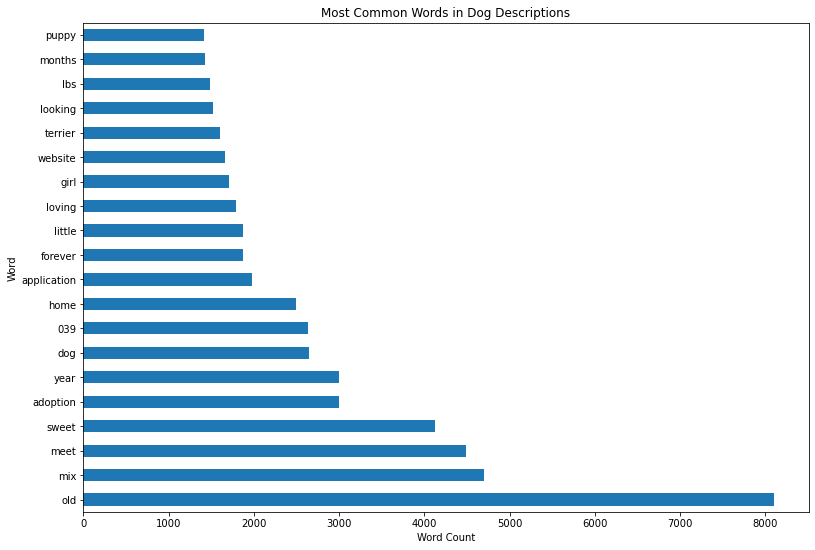

In [6]:
dogs = dogs[dogs['description'].notna()]

dog_cvec= CountVectorizer(stop_words='english')
X = dogs['description']
dog_cvec.fit(X)
X_trans = dog_cvec.transform(X)

X_trans = pd.DataFrame(X_trans.todense(), 
                 columns=dog_cvec.get_feature_names())

plt.figure(figsize = [13, 9])
plt.title('Most Common Words in Dog Descriptions')
plt.xlabel('Word Count')
plt.ylabel('Word')
X_trans.sum().sort_values(ascending = False).head(20).plot(kind='barh');

In [7]:
dogs['desc_len'] = [len(x) for x in dogs['description']]

In [8]:
# Adding a compound polarity score column
dogs = dogs[dogs['description'].notna()]

desc_list = dogs['description'].tolist()

analyzer = SentimentIntensityAnalyzer()

def get_polarity(desc_list):
    polarity = []
    for post in desc_list:
        vs = analyzer.polarity_scores(post)
        polarity.append(vs['compound']) 
    return polarity

polarity = get_polarity(desc_list)

dogs['polarity'] = polarity

### EDA

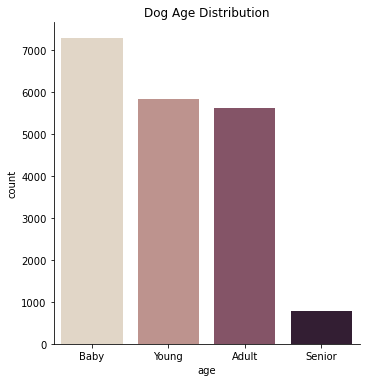

In [9]:
sns.catplot(x='age', kind='count', palette='ch:.25', data=dogs, legend_out=True)
plt.title('Dog Age Distribution');

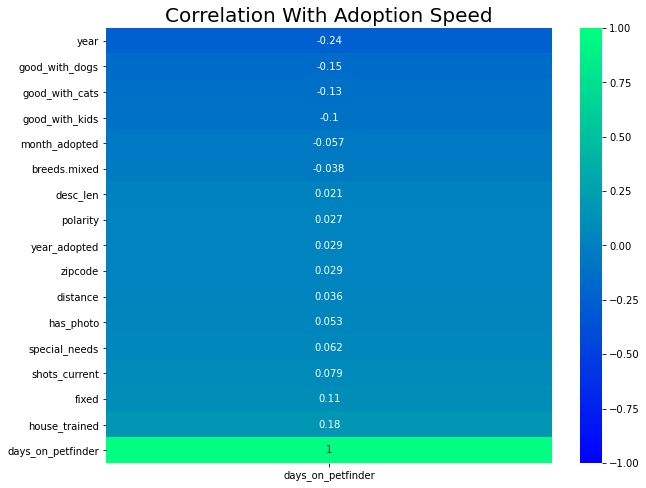

In [11]:
plt.figure(figsize=(10, 8))
sns.heatmap(dogs.corr()[['days_on_petfinder']].sort_values(by='days_on_petfinder', ascending=True),
            vmin = -1, vmax=1,
            cmap ='winter',
            annot = True,);
plt.title("Correlation With Adoption Speed", size = 20);